
# Laboratorio 2

**Universidad Nacional de Colombia - Sede Bogotá**

 _**Metodos Numericos**_

 **Docente:**   
German Jairo Hernandez Perez

 **Estudiante:** Luis Miguel Báez Aponte - lmbaeza@unal.edu.co

**Elegir la version 3.7 de python**

In [189]:
#!/usr/bin/env python3.7

**Installar extensión de Fortran en Colab**

In [190]:
!pip install -U fortran-magic

Requirement already up-to-date: fortran-magic in /usr/local/lib/python3.7/dist-packages (0.7)


In [191]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [192]:
assert ran_the_first_cell, "Oh noes!"

In [193]:
a = 10
b = 5
c = a + b
d = a + b - 1
assert c==15, "Algo salió mal c=15"
# assert d==15, "Algo salió mal d=15", AssertionError: Algo salió mal d=15

In [194]:
class Point:
  def __init__(self, x, y):
    self.x = x
    self.y = y
  def __repr__(self):
    return "Point{" + str(self.x)+", " + str(self.y)+"}"

l = [1, Point(10, 20),  3.0, 4, 5.0, 1 + 3j, "six", 'two']
print(l)

[1, Point{10, 20}, 3.0, 4, 5.0, (1+3j), 'six', 'two']


In [195]:
first = int(l[0]) * 100
second = l[1]
print("first:", first)
print("second:", second)

first: 100
second: Point{10, 20}


In [196]:
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: two
second to last: six


In [197]:
sublist = l[1:4]
sublist

[Point{10, 20}, 3.0, 4]

In [198]:
first_three = l[1:4]
n = len(first_three)
first_three = l[:n-1]
first_three

[1, Point{10, 20}]

In [199]:
after_three = l[1:]
after_three

[Point{10, 20}, 3.0, 4, 5.0, (1+3j), 'six', 'two']

In [200]:
l = [chr(ord('a')+ch) for ch in range(0, 26)]
l[1:24:3]

['b', 'e', 'h', 'k', 'n', 'q', 't', 'w']

In [201]:
l[::-1]

['z',
 'y',
 'x',
 'w',
 'v',
 'u',
 't',
 's',
 'r',
 'q',
 'p',
 'o',
 'n',
 'm',
 'l',
 'k',
 'j',
 'i',
 'h',
 'g',
 'f',
 'e',
 'd',
 'c',
 'b',
 'a']

In [202]:
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('Any Value')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'Any Value']


In [203]:
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.insert(0, 'Another Any Value')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: ['Another Any Value', 1, 2, 3, 4, 5]


In [204]:
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

# Dictionaries

In [205]:
philosophers = {'Gorgias': 'Leontinos', 'Protagoras': 'Abdera', 'Antifonte': 'Atenas'}
for key, value in philosophers.items():
  print(key, "de", value)

Gorgias de Leontinos
Protagoras de Abdera
Antifonte de Atenas


In [206]:
# Like lists, dictionaries are size-mutable.
philosophers['Meliso'] = 'Samos'
for key, value in philosophers.items():
  print(key, "de", value)

Gorgias de Leontinos
Protagoras de Abdera
Antifonte de Atenas
Meliso de Samos


In [207]:
del philosophers['Gorgias']
for key, value in philosophers.items():
  print(key, "de", value)

Protagoras de Abdera
Antifonte de Atenas
Meliso de Samos


# Lists 1D, 2D, ...

In [208]:
a = [[63, 23,  32],
     [24, 354, 435],
     [53, 644, 7],
     [13, 132, 1000]]

b = [[11, 29, 43, 434],
     [2, 32, 44, 53]]

In [209]:
def matmul(A, B):
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [210]:
%%time
matmul(a, b)

CPU times: user 31 µs, sys: 0 ns, total: 31 µs
Wall time: 36 µs


[[739, 2563, 3721, 28561],
 [972, 12024, 16608, 29178],
 [1871, 22145, 30615, 57134],
 [407, 4601, 6367, 12638]]

In [211]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(3, 3)
randm

[[0.11056570246704212, 0.9326542926171651, 0.47644618238044356],
 [0.4649506852686429, 0.28157298471240577, 0.4891358798434786],
 [0.03741483582375793, 0.6996709933589612, 0.3574756364098042]]

In [212]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 9.72 s, sys: 34.6 ms, total: 9.75 s
Wall time: 9.78 s


In [213]:
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [214]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [215]:
list_data = [float(i) for i in range(int(1e6))]
array_data = np.array(list_data)

In [216]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 94.5 ms, sys: 0 ns, total: 94.5 ms
Wall time: 96.1 ms


3.3333283333312755e+17

In [217]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 1.47 ms, sys: 0 ns, total: 1.47 ms
Wall time: 1.5 ms


3.3333283333312755e+17

## Why is the Python Version so Much Slower?

In [218]:
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

x1 = mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
[type(x) for x in x1]

[int, complex, float, str]

In [219]:
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


In [220]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [221]:
data + data

array([2, 4, 6, 8])

In [222]:
%%time
(array_data * array_data).sum()

CPU times: user 3.02 ms, sys: 1.01 ms, total: 4.03 ms
Wall time: 5.1 ms


3.333328333335e+17

In [223]:
%%time
array_data.dot(array_data)

CPU times: user 600 µs, sys: 4.01 ms, total: 4.61 ms
Wall time: 5.68 ms


3.333328333334115e+17

In [224]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 2.09 ms, sys: 966 µs, total: 3.05 ms
Wall time: 1.57 ms


3.3333283333312755e+17

In [225]:
# data[0] = "foo"

In [226]:
# data.append(3)

In [227]:
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

# What's in an Array?

In [228]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [229]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [230]:
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [231]:
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [232]:
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [233]:
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [234]:
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

# Selections

We often want to perform an operation on just a subset of our data.

In [235]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [236]:
sines[0]

0.0

In [237]:
sines[:3] 

array([0.        , 0.34185385, 0.64251645])

In [238]:
sines[5:]

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [239]:
sines[::2]

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [240]:
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [241]:
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [242]:
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [243]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [244]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [245]:
market_caps = np.array([12, 6, 10, 5, 6])
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [246]:
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [247]:
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [248]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [249]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [250]:
data[:2, :2]

array([[0, 1],
       [5, 6]])

In [251]:
data[:2, [0, -1]]

array([[0, 4],
       [5, 9]])

In [252]:
data[(data[:, 0] % 2) == 0]

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review


## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [253]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [254]:
variance(np.random.standard_normal(1000))

0.9527021946321067

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [255]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [256]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [257]:
data.mean()

14.5

In [258]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [259]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review


# Broadcasting

In [260]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [261]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [262]:
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review


# Numpy Review

In [263]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [264]:
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [265]:
s.iloc[0]

1

In [266]:
s.loc['a']

1

In [267]:
s.iloc[:2]

a    1
b    2
dtype: int64

In [268]:
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [269]:
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [270]:
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [271]:
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [272]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [273]:
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [274]:
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [275]:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [276]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

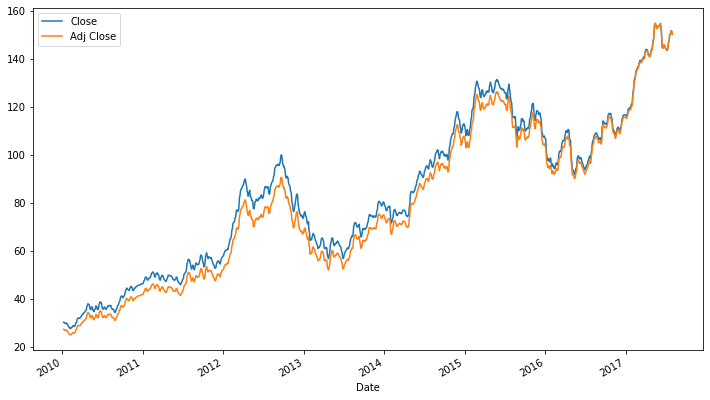

In [277]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

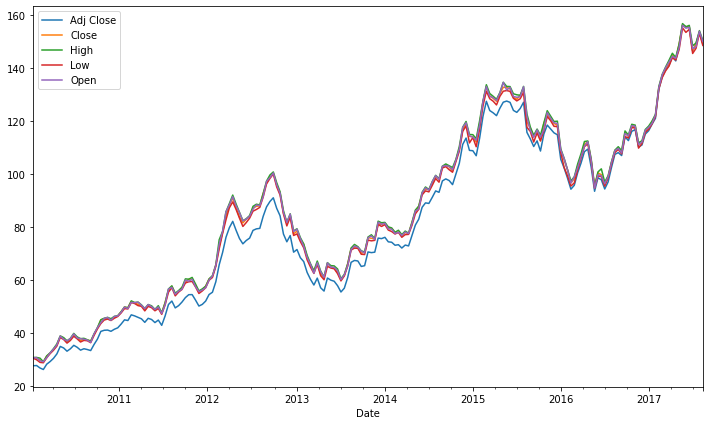

In [278]:
aapl.drop('Volume', axis=1).resample('2W').max().plot();

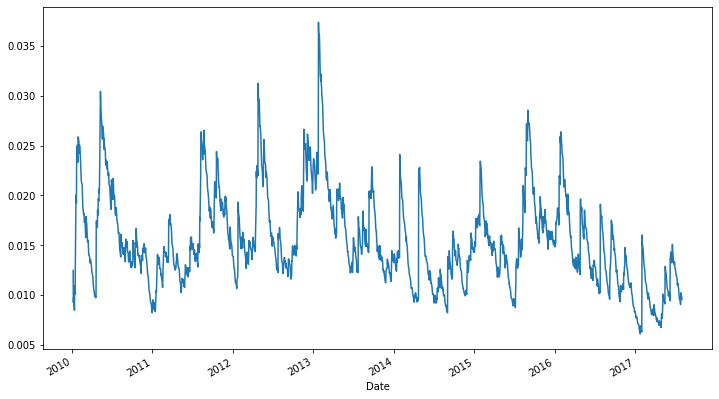

In [279]:
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [280]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [281]:
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

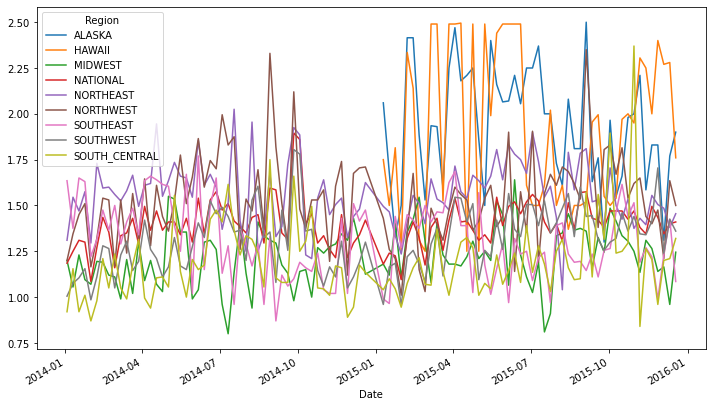

In [282]:
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [283]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

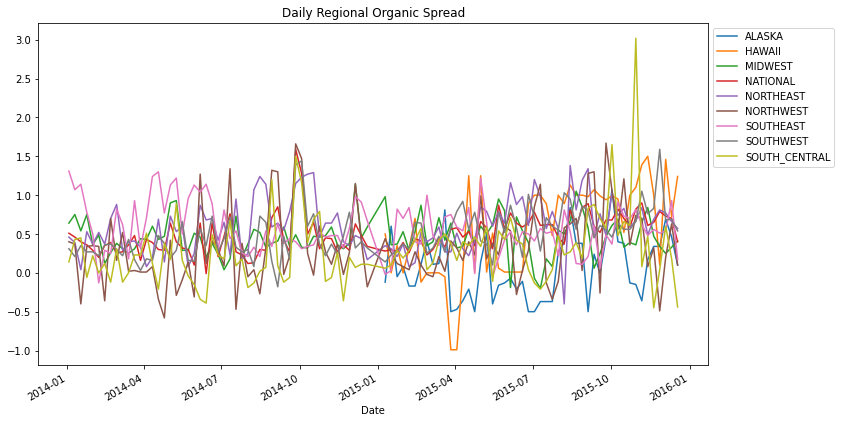

In [284]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [285]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


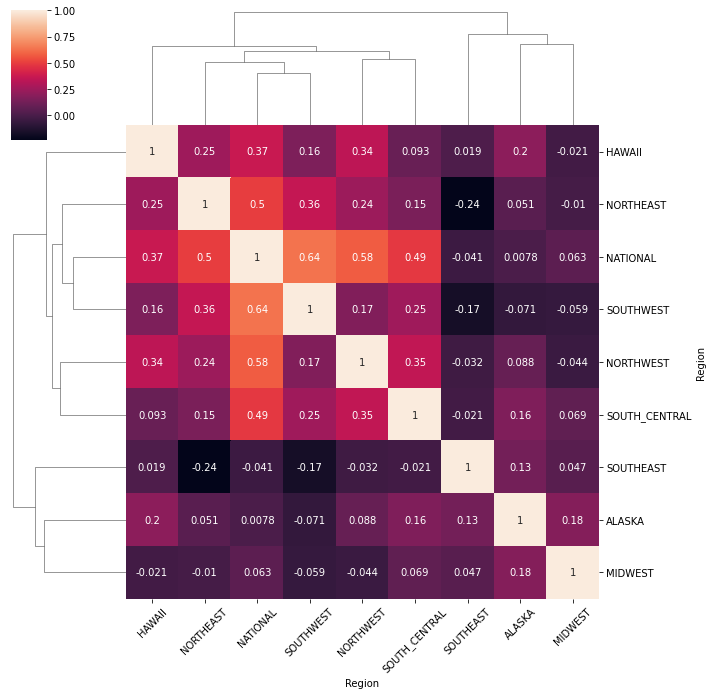

In [286]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review


# Thanks!

# Analisis de datos de Colegios del Departamento de Casanare

In [299]:
colegios = pd.read_csv('Colegios_del_departamento_de_Casanare.csv')
colegios.head()

,departamento,municipio,nombreinstitucion,sedeinstitucional,codigodane,direccioninstitucion,educacionmediapoblacionfemenina,educacionmediapoblacionmasculina,educacionpreescolarpoblacionfemenina,educacionpreescolarpoblacionmasculina,educacionprimariapoblacionfemenina,educacionprimariapoblacionmasculina,educacionsecundariapoblacionfemenina,educacionsecundariapoblacionmasculina,totalestudiantes
0,Casanare,Aguazul,Institución educativa jorge eliecer gaitan,Jorge eliecer gaitan,185010000629,Carrera 19 calle20,119,87,47,43,328,353,349,362,1.688
1,Casanare,Trinidad,Institución educativa rafael garcia herreros,Rafael garcia herreros,285430000866,Corregimiento bocas del pauto,8,10,13,8,43,41,32,35,190.000
2,Casanare,Recetor,Institución educativa fernando rodriguez,Institución educativa fernando rodriguez sede ...,185279000013,Recetor centro,13,16,3,2,14,16,39,28,131.000
3,Casanare,Sacama,Institución educativa técnico antonio nariño,Tecnico antonio nariño,185315000084,Sacama centro,17,22,11,1,46,44,48,58,247.000
4,Casanare,Orocue,Institución educativa indigena iea pudi,Indigena iea pudi,285230000292,Resguardo el duya comunidad piñalito,12,12,4,1,18,33,36,51,167.000


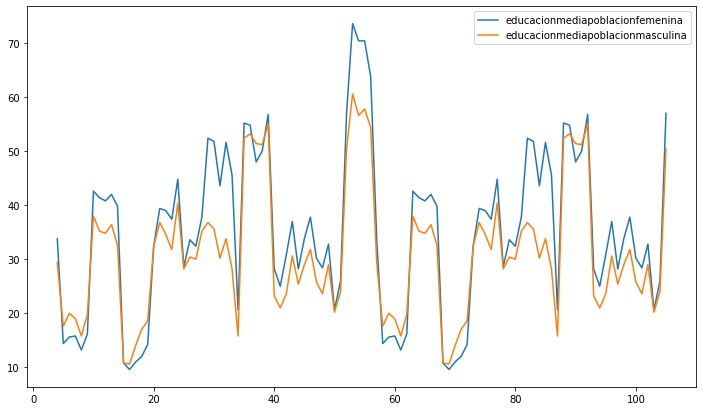

In [300]:
colegios.rolling(5)[['educacionmediapoblacionfemenina', 'educacionmediapoblacionmasculina']].mean().plot();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


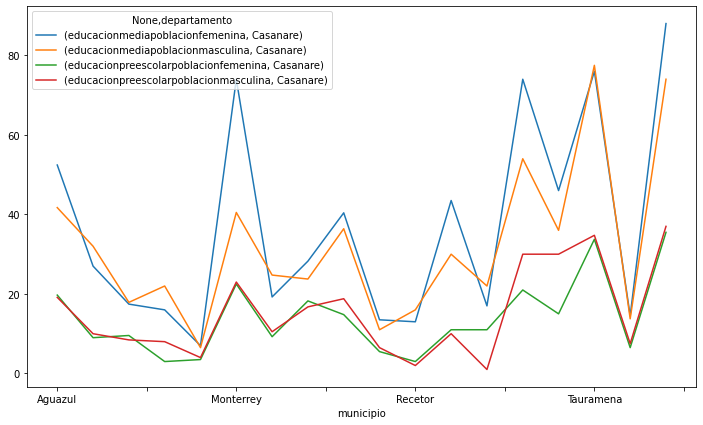

In [301]:
hass = colegios[colegios.departamento == 'Casanare']
hass.groupby(['municipio', 'departamento'])[
  'educacionmediapoblacionfemenina',
  'educacionmediapoblacionmasculina',
  'educacionpreescolarpoblacionfemenina',
  'educacionpreescolarpoblacionmasculina'
].mean().unstack().ffill().plot();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


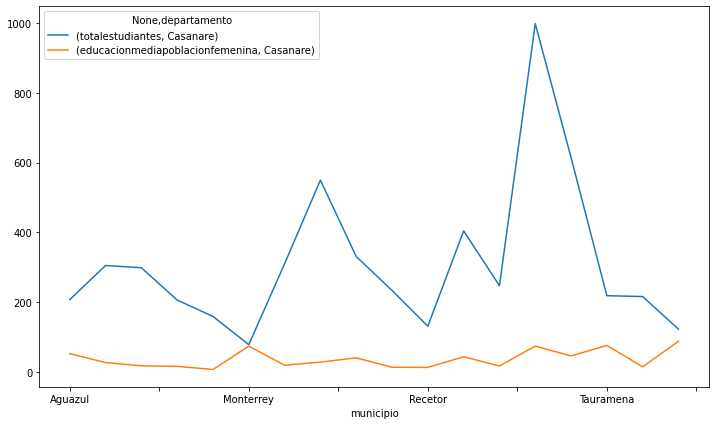

In [302]:
hass = colegios[colegios.departamento == 'Casanare']
hass.groupby(['municipio', 'departamento'])[
  'totalestudiantes',
  'educacionmediapoblacionfemenina'
].mean().unstack().ffill().plot();